In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data=pd.read_csv('/home/vinod/Downloads/Height.csv')

In [3]:
data.head(3)

,Unnamed: 0,Height
0,0,150.710517
1,1,147.493573
2,2,142.378153


In [4]:
data.Height.mean()

150.0322799372912

In [5]:
sample_data=data.sample(n=100,random_state=1)

In [6]:
sample_data.head()

,Unnamed: 0,Height
507,507,150.539230
818,818,148.659965
452,452,148.930840
368,368,151.689354
242,242,149.516885


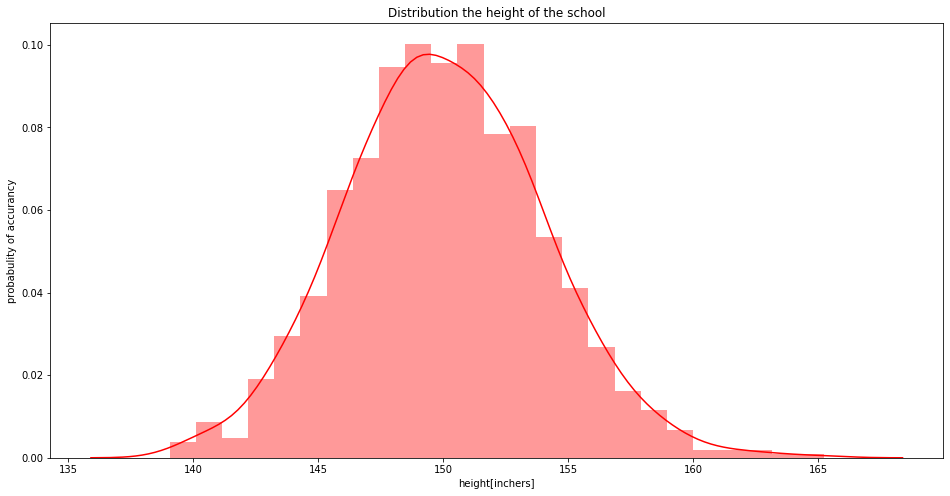

In [7]:
plt.figure(figsize=(16,8))
sns.distplot(data['Height'],color='red')
plt.xlabel('height[inchers]')
plt.ylabel('probabulity of accurancy')
plt.title('Distribution the height of the school')
plt.show()

# z=x¯−μ/σ√n

In [8]:
meanSampData=sample_data['Height'].mean()
hypMean=150
N=100
standPop=data['Height'].std()

In [9]:
a=sample_data['Height'].mean()-150

In [10]:
a

-0.2479876913938881

In [11]:
b=data['Height'].std()/math.sqrt(100)

In [12]:
b

0.3943126153845352

In [13]:
z=a/b

In [14]:
z

-0.6289113807633304

In [15]:
probablity=a/z

In [16]:
probablity

0.3943126153845352

In [17]:
p_value=1-probablity

In [18]:
p_value

0.6056873846154648

# T-TEST

# One sampled t-test

In [19]:
from scipy.stats import ttest_1samp

In [20]:
height_mean =data['Height'].mean()
height_mean
mu=100
tset, pval = ttest_1samp(sample_data,mu)
print(pval)
if ((pval < 0.5).any()): 
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")


[6.96199209e-026 9.54267178e-111]
we are rejecting null hypothesis


In [21]:
ClassAge=pd.read_csv('/home/vinod/Downloads/Class_Age.csv')
A=ClassAge['Class_A_Age'].sample(n=100,random_state=1)
B=ClassAge['Class_B_Age'].sample(n=100,random_state=1)


In [22]:
A.head()

674     53
1699    55
1282    49
1315    54
1210    57
Name: Class_A_Age, dtype: int64

In [23]:
print('mean of A',A.mean())
print('mean of A',B.mean())

mean of A 53.44
mean of A 47.34


In [24]:
from scipy import stats

In [25]:
_,p_value=stats.ttest_ind(A,B,equal_var=True)
print(p_value)
if p_value < 0.05: 
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

6.968406545521242e-12
 we are rejecting null hypothesis


# Two sampled T-test

In [26]:
ClassAge[['Class_A_Age','Class_B_Age']].describe()

,Class_A_Age,Class_B_Age
count,2000.000000,2000.000000
mean,53.232500,48.183500
std,6.073622,5.454512
min,37.000000,32.000000
25%,49.000000,44.000000
50%,53.000000,48.000000
75%,57.000000,52.000000
max,79.000000,66.000000


In [27]:
ttest,pval=stats.ttest_rel(A,B)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.2611707983130121e-10
reject null hypothesis


# Z Test

In [28]:
from statsmodels import stats
import statsmodels.api as sm


In [29]:
ztest ,pval = stats.weightstats.ztest(x1=A,x2=None,value=100)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


0.0
reject null hypothesis


In [30]:
ztest ,pval = stats.weightstats.ztest(x1=A,x2=B,alternative='two-sided')
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


2.9503043378322366e-13
reject null hypothesis


In [31]:
weight=ClassAge.sample(n=100,random_state=1)

In [32]:
from scipy import stats

In [33]:
stat, p = stats.f_oneway(A,B)
print(stat)
print(p)
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

53.24103782583812
6.968406545520861e-12
Probably different distributions


In [34]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [35]:
from statsmodels.formula.api import ols

In [36]:
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)',data=df).fit()
result=sm.stats.anova_lm(model, type=2)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water):C(sun),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


In [37]:
stat, Pval=stats.shapiro((12.80,24.0,0.533))
# print Pval
print(Pval)
alpha = 0.05
if Pval > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

0.9498735666275024
Sample looks Gaussian (fail to reject H0)
